In [76]:
import sklearn.datasets as datasets

# Sklearn toy datasets

Inside package "sklearn.datasets" we can access a number of well-known datasets. We can use the methods "sklearn.datasets.load_<dataset_name>()". The loaded dataset is returned in the form of a dictionary with the following keys:
* 'data': dataset input features
* 'target': desired output
* 'DESCR': String description of the dataset.

Iris plants dataset (classification)

In [77]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Boston house prices dataset (regression)

In [78]:
boston = datasets.load_boston()
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Using our own data dict with scikit-learn estimators

The class "sklearn.feature_extraction.DictVectorizer" allow us to transform a dictionary of features into vector form.
* When feature values are strings, this transformer will do a binary one-hot (aka one-of-K) coding
* If a feature value is a sequence or set of strings, this transformer will iterate over the values and will count the occurrences of each string value.
* Note that this transformer will only do a binary one-hot encoding when feature values are of type string
 * For categorical features are represented as numeric values use OneHotEncoder after

Some important methods:
* fit(X[, y]) Learn a list of feature name -> indices mappings.
* transform(X) Transform feature->value dicts to array or sparse matrix.
* fit_transform(X[, y]) Learn a list of feature name -> indices mappings and transform X.
 * Like fit(X) followed by transform(X), but does not require materializing X in memory.
* get_feature_names() Returns a list of feature names, ordered by their indices.

In [79]:
from sklearn.feature_extraction import DictVectorizer

dataset = [
    {"feature1": "value1", "feature2": 1.0, "feature3": True},
    {"feature1": "value2", "feature2": 1.5, "feature3": False},
    {"feature1": "value3", "feature2": 2, "feature3": True},
]

dv = DictVectorizer()
ds = dv.fit_transform(dataset)
print("Dataset vectorized:", ds.toarray())
print("Features:", dv.get_feature_names())

Dataset vectorized: [[1.  0.  0.  1.  1. ]
 [0.  1.  0.  1.5 0. ]
 [0.  0.  1.  2.  1. ]]
Features: ['feature1=value1', 'feature1=value2', 'feature1=value3', 'feature2', 'feature3']


## Using pandas Dataframes

We can simply use pandas DataFrames e.g.:
* data = pandas.read_csv('my_dataset.csv')
* X, y = data.drop(columns=['label'], axis=1), data['label']

## Preprocessing

Package "sklearn.preprocessing"

### Standarization

"sklearn.preprocessing.StandardScaler"
* Standardize features by removing the mean and scaling to unit variance
* The standard score of a sample x is calculated as: z = (x - u) / s


Some methods:
* fit(X[, y, sample_weight]) Compute the mean and std to be used for later scaling.
* transform(X[, copy])  Perform standardization by centering and scaling
* fit_transform(X[, y]) Fit to data, then transform it.

In [80]:
from  sklearn.preprocessing import StandardScaler

ss = StandardScaler()
aux_data = [
    [1, 0, 2],
    [1.5, 12, 3.2],
    [0.1, 3, 4.2],
]

ss.fit(aux_data)
z_data = ss.transform(aux_data)
print(f'Means={ss.mean_},\nVariances={ss.var_}')
print(f'Standarized data:\n {z_data}')

Means=[0.86666667 5.         3.13333333],
Variances=[ 0.33555556 26.          0.80888889]
Standarized data:
 [[ 0.23017414 -0.98058068 -1.26012384]
 [ 1.09332714  1.37281295  0.07412493]
 [-1.32350128 -0.39223227  1.18599891]]


### Scaling features to a range

We can use:
* sklearn.preprocessing.MinMaxScaler([feature_range=(min, max)])
 * Transform features by scaling each feature to a given range.
* sklearn.preprocessing.MaxAbsScaler()
 * This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0.
 * It does not shift/center the data, and thus does not destroy any sparsity.

For both use .fit() and .transform() or .fit_transform()

Check:
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

NOTES from URL:
* Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.
* MaxAbsScaler also suffers from the presence of large outliers.

In [81]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

sample_data = [
    [-1, 0 , 10],
    [2, -3, 4],
    [5, 6, 5]
]

mms = MinMaxScaler()
mas = MaxAbsScaler()

mms_out= mms.fit_transform(sample_data)
mas_out= mas.fit_transform(sample_data)
print(f'MinMaxScaled=\n{mms_out}\nMaxAbsScaled=\n{mas_out}')


MinMaxScaled=
[[0.         0.33333333 1.        ]
 [0.5        0.         0.        ]
 [1.         1.         0.16666667]]
MaxAbsScaled=
[[-0.2  0.   1. ]
 [ 0.4 -0.5  0.4]
 [ 1.   1.   0.5]]


## Other transformations

* sklearn.preprocessing.OneHotEncoder
* sklearn.preprocessing.KBinsDiscretizer: discretizes features into k bins
* sklearn.preprocessing.Binarizer(threshold=0.0): feature binarization is the process of thresholding numerical features to get boolean values
* sklearn.feature_extraction.text.CountVectorizer(ngram_rangetuple=(min_n, max_n), min_df=1,...): implements both tokenization and occurrence counting
 * vectorizer.fit_transform(corpus)
 * analyze = vectorizer.build_analyzer()
* sklearn.preprocessing.PolynomialFeatures: generates polynomial and interaction features up to a given degree. E.g. [a,b], degree=2 yields [1, a, b, a², ab, b²]
* sklearn.compose.ColumnTransformer(transformers...): Transformers is a list of tuples (name, transformer, columns)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    "Sample text",
    "Another sample",
    "sample content"
]

vectorizer = CountVectorizer()
vectorizer.fit_transform(corpus)
analyze = vectorizer.build_analyzer()
new_text = "Another sample text content"
print(vectorizer.vocabulary_)
print(analyze(new_text))
print(vectorizer.transform(analyze(new_text)).toarray())
print(vectorizer.transform([new_text]).toarray())


{'sample': 2, 'text': 3, 'another': 0, 'content': 1}
['another', 'sample', 'text', 'content']
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]]
[[1 1 1 1]]


## Pipelines

Pipelines can be used to chain multiple estimators into one.
* sklearn.pipeline.Pipeline or sklearn.pipeline.make_pipeline (fills the names of the pipeline steps)
* Encapsulate data preprocessing and model
* Call fit(), fit_transform(), predict()... only once!
* All estimators in a pipeline, except the last one, must be transformers

You can access the pipeline paramers for all steps with:
* pipe.pipe.set_params(<estimator>__<parameter>=value)

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from  sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing import PolynomialFeatures

import numpy as np

pl1 = Pipeline([('step_1', MinMaxScaler())])
pl2 = make_pipeline(MinMaxScaler(), PolynomialFeatures(2))

#Changing default parameters
pl1.set_params(step_1__feature_range=(0,1))
pl2.set_params(minmaxscaler__feature_range=(0,1))

X = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print("Pipeline1", pl1.fit_transform(X))
print("Pipeline2", pl2.fit_transform(X))

Pipeline1 [[0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5]
 [1.  1.  1.  1. ]]
Pipeline2 [[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [1.   0.5  0.5  0.5  0.5  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.  ]]


# Evaluation

* Train & test: sklearn.model_selection.train_test_split
 * Parameters: train_size, test_size, shuffle...
 * X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
* K-Fold evaluation: sklearn.model_selection import cross_val_score
 * scoring: str or callable, default=None (None uses estimator.score)
 * cv: if int number of folds
 * scores = cross_val_score(estimator, X, y, cv=5)
 * To just obtain sample indexes use class:
 sklearn.model_selection.KFold(n_splits=5, shuffle=False)

In [84]:
from sklearn.model_selection import train_test_split, cross_val_score

iris_train_X, iris_test_X, iris_train_y, iris_test_y = train_test_split(iris.data, iris.target)
boston_train_X, boston_test_X, boston_train_y, boston_test_y = train_test_split(boston.data, boston.target)

# Supervised Learning

Class RegressorMixin has method:
* score(X, y, sample_weight=None) Returns the coefficient of determination $R^2$ of the prediction.

Class ClassifierMixin has method:
* score(X, y, sample_weight=None). Returns the mean accuracy on the given test data and labels.

## Linear Models

Base class LinearModel has methods
* fit(X, y)
* predict(X).
See: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

### Regression: Linear regression
* sklearn.linear_model.LinearRegression
* $h_\theta(x) = \theta^T x$ ($x_0$=1)
* Minimization objective: $\min_{w} || X w - y||_2^2$

Some attributes:
* coef_: array of shape (n_features, ) or (n_targets, n_features). Estimated coefficients for the linear regression problem.
* intercept_: float or array of shape (n_targets,). Independent term in the linear model.

### Classification: Logistic regression
* sklearn.linear_model.LogisticRegression(penalty='l2')
* $h_\theta(x) = P(y=1 | x; \theta) = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}$
 * $g(z)\ge 0.5\ when\ z \ge 0$
 * $x_0$=1
* Minimization objective
 * $\min_{w, c} regularizationTerm + \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

Some attributes:
* coef_ : coef_ndarray of shape (1, n_features) or (n_classes, n_features). Coefficient of the features in the decision function.
* intercept_: intercept_ndarray of shape (1,) or (n_classes,). Intercept (a.k.a. bias) added to the decision function.

## Naive Bayes
By aplying the Baye's Theorem with the assumption of conditional independence between every pair of features:
* $P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}{P(x_1, \dots, x_n)}$
* assumption: $P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$
* We obtain: $P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$
* With a constant input we can clasify with:
 * $P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$
 * $\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y) $

From sklearn's API:
* "The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$"
* sklearn.naive_bayes.BernoulliNB(*[, alpha, …]): Naive Bayes classifier for multivariate Bernoulli models.
* sklearn.naive_bayes.CategoricalNB(*[, alpha, …]): Naive Bayes classifier for categorical features
* sklearn.naive_bayes.ComplementNB(*[, alpha, …]): The Complement Naive Bayes classifier described in Rennie et al.
* sklearn.naive_bayes.GaussianNB(*[, priors, …]): Gaussian Naive Bayes (GaussianNB)
* sklearn.naive_bayes.MultinomialNB(*[, alpha, …]): Naive Bayes classifier for multinomial models

In [85]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()


mnb.fit(iris_train_X, iris_train_y)
score = mnb.score(iris_test_X, iris_test_y)
predict = mnb.predict(iris_test_X)

print(score, predict)

0.5789473684210527 [0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 2 1 0 1 1 0 0 1 1 1
 1]


## K-Nearest Neighbours: Unsupervised Learning, Clustering

K-Nearest Neighbours is a type of instance-based learning.
* Class: sklearn.neighbors.NearestNeighbors(n_neighbors=5, algorithm='auto',...)
* For classification: sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='auto', ...)
* For Regression: sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, algorithm='auto', ...)

K-Means algorithm. Given a desired number of clusters k:
* Randomly initialize k cluster centroids $\mu_i$(centers).
* Repeat until convergence...
 * Assign clusters to all data points.
 * $x^{(i)}$ is assigned to cluster $c^{(i)}$ with closest centroid $\mu_c^{(i)}$.
 * Move cluster centroid ($\mu_k$) to the average of points on the cluster.

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(iris_train_X, iris_train_y)
score = knn.score(iris_test_X, iris_test_y)
predict = knn.predict(iris_test_X)

print(score, predict)

0.9210526315789473 [0 2 2 1 1 2 1 2 1 2 2 0 0 0 2 0 2 0 0 2 1 0 2 2 2 1 2 2 2 0 2 2 0 0 1 2 1
 1]


## Support Vector Machines (SVM)

### SVM and kernels (a.k.a. "the kernel trick")
We can map from a non-linearly separable data into a higher dimension where the linear classifier is able separate them. The idea is:
* Choose some landmarks $l^{(i)}$ and a similarity function $f_i(x, l^{(i)})$called kernel.
* Use $f_i(x, l^{(i)})$ as features for our SVM. We have mapped from an n-dimensional space (number of original features of x) to a m-dimensional space (number of landmarks). Usually $m>>n$.

### sklearn SVM API

Classification with SVC: sklearn.svm.SVC
Regression with SVR: sklearn.svm.SVR

* Some common parameters (kernel='rbf', degree=3, C=1.0)
 * kernel={‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
  * If kernel='poly' constructor parameter degree is used.
  * For linear kernel is faster to use sklearn.svm.LinearSVC or sklearn.svm.LinearSVR
 * C: Regularization parameter
* use fit(X,y) and predict(X) as usual

In [87]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(iris_train_X, iris_train_y)
score = svc.score(iris_test_X, iris_test_y)
predict = svc.predict(iris_test_X)

print(score, predict)

0.868421052631579 [0 2 2 1 1 2 1 1 1 2 2 0 0 0 2 0 2 0 0 2 1 0 2 2 2 1 1 2 2 0 2 2 0 0 1 2 1
 1]


## Decision Trees

The idea of this tree model is:
* Supervised learning method used for classification or regression.
* We partition our input data into regions (disjoint data subsets) starting at the root node.
* Each non-leaf node contains a decision or rule to perform said partitioning.
 * The quality of each split is measured by an impurity metric: entropy, Gini...
* Leaf nodes contains the model prediction for the input.
* Many algorithm variants for building the tree: ID3, C4.5, C5, CART...

Decision trees on sklearn:

* Decision Tree Classifier: sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, ...)
* Decision Tree Regression: sklearn.tree.DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, ...)
* For both, as usual, methods: fit, predict, ...
* To plot the tree: sklearn.tree.plot_tree(decision_tree, max_depth=None, feature_names=None, class_names=None, impurity=True, filled=False, ...)
 * For more check methods sklearn.tree.export_graphviz and sklearn.tree.export_text
 * Attribute "tree_" provides access the tree itself.

### Example DecisionTreeClassifier

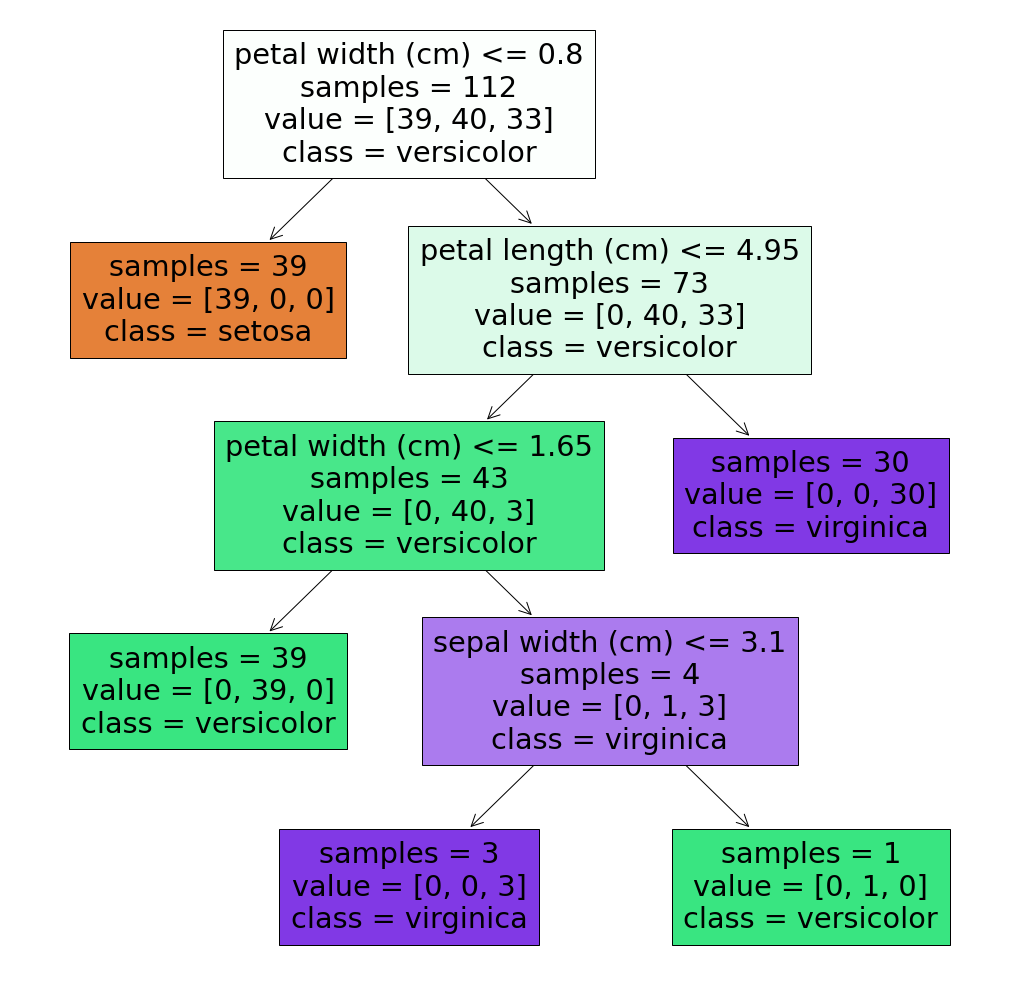

0.9473684210526315 |--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2



In [88]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

dtc = DecisionTreeClassifier()
dtc.fit(iris_train_X, iris_train_y)


plt.figure(figsize=(18,18)) #To change default size
tree.plot_tree(dtc, feature_names=iris.feature_names,
               class_names=iris.target_names,
               impurity=False, filled=True)
plt.show() #only needed here because plt.figure() is used

score = dtc.score(iris_test_X, iris_test_y)
tree_txt = tree.export_text(dtc)
print(score, tree_txt)

### Example DecisionTreeRegressor

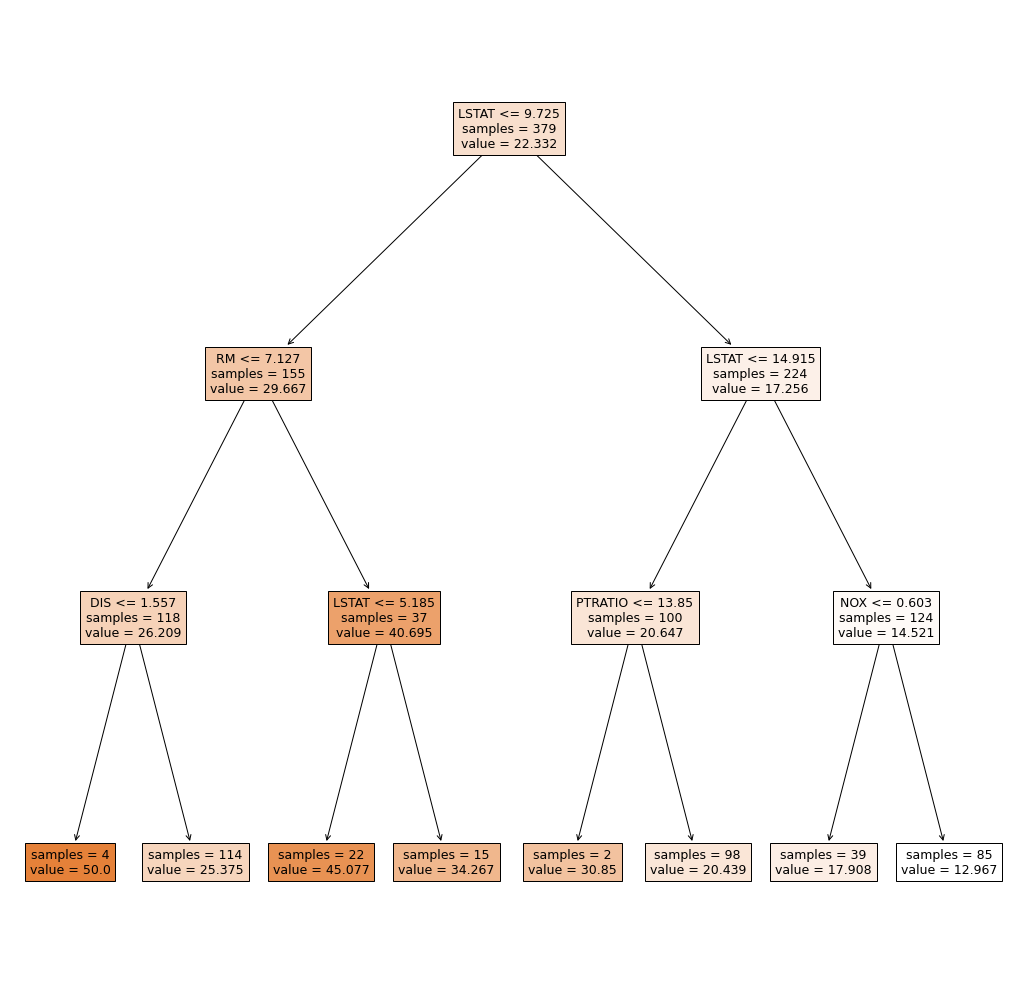

0.7366410962714971 |--- feature_12 <= 9.72
|   |--- feature_5 <= 7.13
|   |   |--- feature_7 <= 1.56
|   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.56
|   |   |   |--- value: [25.37]
|   |--- feature_5 >  7.13
|   |   |--- feature_12 <= 5.18
|   |   |   |--- value: [45.08]
|   |   |--- feature_12 >  5.18
|   |   |   |--- value: [34.27]
|--- feature_12 >  9.72
|   |--- feature_12 <= 14.92
|   |   |--- feature_10 <= 13.85
|   |   |   |--- value: [30.85]
|   |   |--- feature_10 >  13.85
|   |   |   |--- value: [20.44]
|   |--- feature_12 >  14.92
|   |   |--- feature_4 <= 0.60
|   |   |   |--- value: [17.91]
|   |   |--- feature_4 >  0.60
|   |   |   |--- value: [12.97]



In [89]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(boston_train_X, boston_train_y)

plt.figure(figsize=(18,18)) #To change default size
tree.plot_tree(dtr, feature_names=boston.feature_names,
               impurity=False, filled=True)
plt.show() #only needed here because plt.figure() is used

score = dtr.score(boston_test_X, boston_test_y)
tree_txt = tree.export_text(dtr)
print(score, tree_txt)

## Stochastic Gradient Descent (SGD)

Gradient Descent:
* If a multivariate function $F(x)$ is differentiable in the neighbourhood of a point $a$, then $F(x)$ decreases fastest in the direction of the negative gradient at $a$, that is $- \nabla F(a)$.
* Analogy: descending a foggy mountain, you only see a certain area close to you with the goal of reaching the lowest ground.
* Feature Scaling: make sure that all features have similar value ranges, it helps gradient descent to converge faster.
* We can search the minimum by following an iterative process such as:
 * $a_{n+1}=a_n - \alpha \nabla F(a_n) ; n \ge 0$.
 * $\alpha$ is the learning rate

Gradient Checking:
* Less efficient
* Instead of calculating the derivative to obtain the gradient at a given point you can numerically approximate the derivative by calculating:
 * $\frac{\delta f}{\delta \theta} \simeq \frac{f(\theta+\epsilon)-f(\theta-\epsilon)}{2\epsilon}$

SGD is sensitive to feature scaling!

sklearn's SGD API:
* Classification: sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, ...)
* Regression: sklearn.linear_model.SGDRegressor(loss='squared_loss', *, penalty='l2', alpha=0.0001, ...)

Model used internally depends on selected loss function L.

Some SGDClassifier Losses:
* ‘hinge’: SVC
* ‘log’: Logistic Regression
* ‘perceptron’: Perceptron

Example of loss for SGDRegressor:
* ‘epsilon_insensitive‘: SVR

In [90]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

sgdr = SGDRegressor(loss="epsilon_insensitive")
reg = make_pipeline(StandardScaler(),
                    sgdr)
boston = datasets.load_boston()
reg.fit(boston_train_X, boston_train_y)
score = reg.score(boston_test_X, boston_test_y)
print(score)

0.729367607225085


## Hyper-parameter tuning for an estimator

### Exahustive grid search: GridSearchCV

sklearn.model_selection.GridSearchCV(estimator, param_grid, cv=None)
* param_grid: dict or list of dictionaries. Dictionary with parameters names (str) as keys and lists of parameter
settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the
list are explored. This enables searching over any sequence of parameter settings.

Attributes:
* cv_results_: dict of numpy (masked) ndarrays. A dict with keys as column headers and values as columns,
that can be imported into a pandas
 * cv_results_['params']
 * cv_results_['mean_test_score']
 * cv_results_['std_test_score']
 * cv_results_['rank_test_score']


Example:

In [91]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV


param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

iris = datasets.load_iris()
svc = SVC()
gs = GridSearchCV(svc, param_grid)
gs.fit(iris_train_X, iris_train_y)
print(gs.cv_results_)

r = gs.cv_results_
aux = zip(r['rank_test_score'], r['mean_test_score'], r['std_test_score'], r['params'])

print("*** Ranking ***")
print("'rank_test_score', 'mean_test_score', 'std_test_score', 'params'")
for s in sorted(aux, key=lambda x: x[0]):
    print(s)

{'mean_fit_time': array([0.00081444, 0.00079203, 0.00070143, 0.00075135, 0.0009726 ,
       0.00106077, 0.00082078, 0.00099473, 0.00067482, 0.00080924,
       0.00070634, 0.00067334]), 'std_fit_time': array([4.05179732e-05, 7.89213755e-05, 4.30721491e-05, 7.05919688e-05,
       2.08970042e-05, 1.35636361e-04, 6.81099081e-05, 4.99017319e-05,
       4.60666651e-05, 3.95592107e-05, 7.66529043e-05, 2.55209911e-05]), 'mean_score_time': array([0.0005024 , 0.00051932, 0.00035787, 0.00036287, 0.00057373,
       0.00056038, 0.00049858, 0.00054784, 0.00040092, 0.0004993 ,
       0.00040574, 0.00040741]), 'std_score_time': array([2.87819493e-04, 3.38793972e-04, 3.46798653e-05, 4.50783903e-05,
       4.85519051e-05, 2.62289046e-05, 8.59947755e-06, 1.29761050e-05,
       2.97631961e-06, 1.26872739e-05, 6.33943121e-05, 6.37679450e-06]), 'param_C': masked_array(data=[1, 10, 100, 1000, 1, 1, 10, 10, 100, 100, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False,
     

### Randomized search: RandomizedSearchCV

Class sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=None)
* The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.
* In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.
* The number of parameter settings that are tried is given by n_iter

To use as sampling sources for parameters:
* scipy.stats: contains many useful distributions for sampling parameters, such as expon, gamma, uniform or randint

Attributes:
* cv_results_ Same as GridSearchCV

Rewritting the previous example:

In [92]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

param_grid = [
  {'C': stats.expon(scale=100), 'kernel': ['linear']},
  {'C': stats.expon(scale=100), 'gamma': stats.expon(scale=.1), 'kernel': ['rbf']},
 ]

iris = datasets.load_iris()
svc = SVC()
rs = RandomizedSearchCV(svc, param_grid)
rs.fit(iris_train_X, iris_train_y)
print(rs.cv_results_)

r = rs.cv_results_
aux = zip(r['rank_test_score'], r['mean_test_score'], r['std_test_score'], r['params'])

print("*** Ranking ***")
print("'rank_test_score', 'mean_test_score', 'std_test_score', 'params'")
for s in sorted(aux, key=lambda x: x[0]):
    print(s)

{'mean_fit_time': array([0.00105882, 0.0008378 , 0.00064001, 0.00085039, 0.00094547,
       0.00134034, 0.00835299, 0.00308566, 0.00284562, 0.00165005]), 'std_fit_time': array([1.92767695e-04, 2.54973037e-04, 1.79791006e-05, 1.71666503e-04,
       1.53690660e-04, 2.98237014e-04, 1.04477118e-02, 1.46550663e-03,
       1.08089582e-03, 5.13169336e-04]), 'mean_score_time': array([0.00062127, 0.00039663, 0.00036678, 0.00037179, 0.00044966,
       0.00072412, 0.00135403, 0.00181546, 0.0038538 , 0.00149083]), 'std_score_time': array([2.20939933e-04, 9.82735354e-05, 1.69197252e-05, 2.37020206e-05,
       9.09997212e-05, 1.45835280e-04, 6.62115745e-04, 9.62250705e-04,
       5.04320226e-03, 6.94835876e-04]), 'param_C': masked_array(data=[52.087886009391596, 69.12320765641148,
                   97.57467432639012, 99.28927723139503,
                   21.40446336910189, 54.825217593073546,
                   203.90007567607228, 49.153474573056,
                   173.27717270423068, 73.909338364

## Ensembles

Ensembles consist on a combination multiple base models into one with better predictive performance.

## Bagging (Bootstrap AGGregatING)

Bagging consists in training $l$ unstable models (slight changes in data generates large difference in fitted model):
* If training set consists of size $n$, create $l$ sets of size $n$ by sampling with replacement.
 * Each bootstrap sample is expected to have approximately 63% of different instances from the training set.
* We train each model on its respective new training set.
* Metamodel prediction is obtained via voting or averaging (on regresion).

sklearns' API:
* sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, ...)
 * Default base estimator is DecisionTreeClassifier.
* sklearn.ensemble.BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, ...)
 * Default base estimator is DecisionTreeRegressor.

In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bc = BaggingClassifier(base_estimator=SVC())
bc.fit(iris_train_X, iris_train_y)
bc.score(iris_test_X, iris_test_y)

0.8947368421052632

### Random Forest

Random forest is an ensemble of decision trees:
* Each tree has a "vote" on the global prediction.
* To build each tree:
 * We sample our training data with replacement $n$ (size of training set).
 * At each node we select a random subset of features of size $m$ to use for that node.

sklearn's API:
* sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, ...)
* sklearn.ensemble.RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, ...)
* As usual, methods: fit(), predict(),...

### Example of RandomForestClassifier showing internals

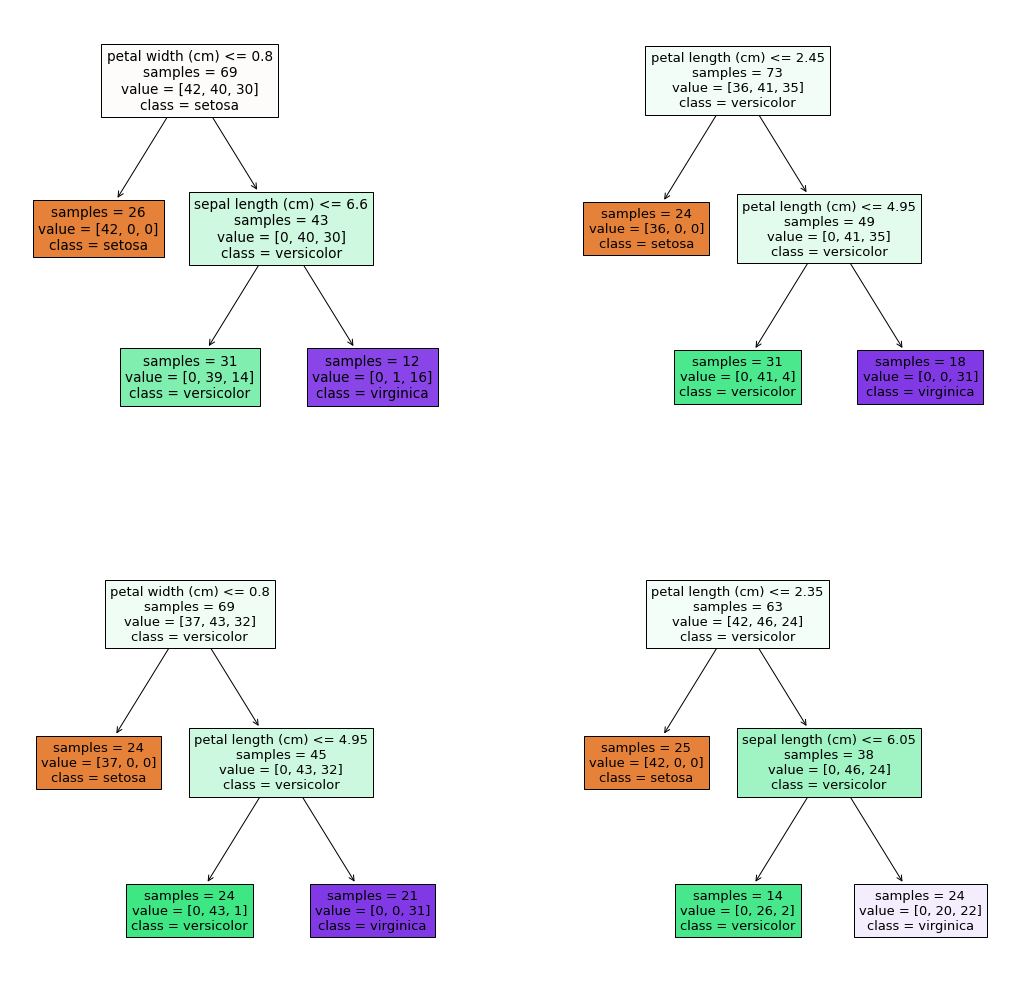

0.868421052631579

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from matplotlib import pyplot as plt

rfc = RandomForestClassifier(n_estimators=4, max_depth=2)
rfc.fit(iris_train_X, iris_train_y)


fig, ((a1,a2),(a3,a4)) = plt.subplots(2,2, figsize=(18,18))
axs = [a1,a2,a3,a4]
for tc,ax in zip(rfc.estimators_, axs):
    tree.plot_tree(tc,
                   feature_names=iris.feature_names, class_names=iris.target_names,
                   impurity=False, filled=True, ax=ax)
plt.show()
rfc.score(iris_test_X, iris_test_y)

## Boosting

With Boosting:
* The metamodel builds incrementally (one model is added with each iteration).
* Each base-learner (models used internaly by boosting) is trained on the mistake of the previous one.
* Training set is selectively sampled:
 * All instances star with the same probability of being chosen.
 * Instances wrongly predicted increase their probability of being chosen on the next iteration.
* Metamodel prediction is calculated by weighted voting (relative to each model accuracy on the training set).

sklearn's API:
* Classification: sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50, ...)
 * Default base estimator: DecisionTreeClassifier initialized with max_depth=1.
* Regresion: sklearn.ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, ...)
 * Default base estimator: DecisionTreeRegressor initialized with max_depth=3.

In [95]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate=.5)
abr.fit(boston_train_X, boston_train_y)
abr.score(boston_test_X, boston_test_y)


0.8500600172493225